# Project 1

- load the dataset https://data.melbourne.vic.gov.au/api/views/ez6b-syvw/rows.csv into a Python Pandas dataframe
- calculate the median and
- standard deviation for each place of measurement.
- visualize each time series for respective places in the same figure.
- The x-axis should have the correct time index indicated in the figure.

If Python is totaly new for you take a short quided tour to the language: https://www.w3schools.com/python/python_intro.asp or more comprehensive one: https://wiki.python.org/moin/BeginnersGuide

Afterwords you will always need to consult the documentation: https://docs.python.org/3.6/

You will also find relevant things at https://docs.python.org/3.6/faq/programming.html

Before you strart this exersise, read http://pandas.pydata.org/pandas-docs/stable/dsintro.html


In [54]:
# activate pandas package
import pandas as pd

Read in the dowloaded CVS file into pandas DataFrame object with `read_cvs()`

If you get `FileNotFoundError: File b'Sensor_readings.csv' does not exist` check that your file is in the same directory as the active `.ipynb file` or provide full file path.

In [55]:
data = pd.read_csv("Sensor_readings__with_temperature__light__humidity_every_5_minutes_at_8_locations__trial__2014_to_2015_.csv")

`data` is now an instance of [class DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

`head()` is a method defined in the class

In [56]:
data.head(5)

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position
0,12/15/2014 01:40:00 AM,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN
1,12/15/2014 01:40:00 AM,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN
2,12/15/2014 01:45:00 AM,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN
3,12/15/2014 01:45:00 AM,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN
4,12/15/2014 01:45:00 AM,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN


`shape` is an attribute of class DataFrame, note absence of `()`

In [57]:
data.shape[0]

56570

In [58]:
data.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 20 columns):
timestamp       56570 non-null object
mac             56570 non-null object
boardtype       56570 non-null int64
boardid         56570 non-null int64
temp_max        56570 non-null float64
temp_min        56570 non-null float64
temp_avg        56570 non-null float64
light_max       56570 non-null float64
light_min       56570 non-null float64
light_avg       56570 non-null float64
humidity_min    56570 non-null float64
humidity_max    56570 non-null float64
humidity_avg    56570 non-null float64
model           56570 non-null object
latitude        56570 non-null float64
longitude       56570 non-null float64
elevation       34975 non-null float64
location        56570 non-null object
rowid           56570 non-null object
Position        0 non-null float64
dtypes: float64(13), int64(2), object(5)
memory usage: 25.9 MB


In [5]:
# some columns are totaly useless, you may whant to drop them.
data.drop(columns=['mac', 'boardtype', 'Position', 'model', 'rowid'], inplace=True)
data.head()

,timestamp,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,elevation,location
0,12/15/2014 01:40:00 AM,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,-37.813408,144.979492,30.10,Fitzroy Gardens
1,12/15/2014 01:40:00 AM,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,-37.813073,144.980406,29.91,Fitzroy Gardens
2,12/15/2014 01:45:00 AM,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,-37.814922,144.982258,38.79,Fitzroy Gardens
3,12/15/2014 01:45:00 AM,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,-37.814610,144.979018,22.57,Fitzroy Gardens
4,12/15/2014 01:45:00 AM,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,-37.814808,144.980999,29.96,Fitzroy Gardens


Hmm, looks like some columns hold same values. Check if there are any rows where `temp_max`, `temp_min` and `temp_avg` are different. If there are none - drop `temp_max` and `temp_min`.

Check the amount of rows in the dataframe

In [59]:
len(data)

56570

Compare the number to the amount of rows `len(data)` in the filtered dataframe, 
where values of `temp_min` and `temp_max` are the same in the same row. 
Note: you may sometimes use different syntax for column selection in pandas.

https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

Attribute-access is nice, because it allows tab-completion 

https://ipython.readthedocs.io/en/stable/interactive/reference.html?highlight=completion#command-line-completion

In [60]:
len(data[data.temp_max == data.temp_min])

56570

In [9]:
len(data.query('temp_max == temp_avg'))

56570

Then you are interested in how many different locations the data holds. The [`unique()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html) from `Series` class will be helpful.

In [61]:
data.location.unique()

array(['Fitzroy Gardens', 'Docklands Library'], dtype=object)

In [64]:
(data[data.location == 'Fitzroy Gardens']).boardid.unique()

array([508, 505, 507, 502, 501], dtype=int64)

Can you see how many rows are from Fitzroy Gardens?

In [65]:
(data[data.location == 'Docklands Library']).boardid.unique()

array([506, 511, 510, 509], dtype=int64)

Try to print out the folowing information automaticaly with 5-6 lines of code ([for-loop](https://www.w3schools.com/python/python_for_loops.asp)):

In [66]:
# The below code snippet will print How many rows are from Fitzroy Gardens along with Board Id's

a=(data[data.location == 'Fitzroy Gardens']).boardid.unique()
b=(data[data.location == 'Docklands Library']).boardid.unique()

print("===========================")
print(data.location.unique()[0])
print("===========================")

for i in range(len(a)):
    c=0
    for l in range(len(data.boardid)):
        if(a[i] == data.boardid[l]):
            c=c+1 # Here c will holds the number of rows each board will have 
    print("board %s  " % a[i],"rows %s " % c)
print("\n")

# The below code snippet will print How many rows are from Docklands Library along with Board Id's
print("===========================")
print(data.location.unique()[1])
print("===========================")

for i in range(len(b)):
    c=0
    for l in range(len(data.boardid)):
        if(b[i] == data.boardid[l]):
            c=c+1
    print("board %s " % b[i],"rows %s " % c)    

Fitzroy Gardens
board 508   rows 2728 
board 505   rows 2915 
board 507   rows 2918 
board 502   rows 2725 
board 501   rows 2903 


Docklands Library
board 506  rows 6626 
board 511  rows 4598 
board 510  rows 12038 
board 509  rows 19119 


## Median (aka expected value)

You'd like to have a function that takes an unsorted pandas.Series object (or a list) and returns a median for it.

Sort the serie: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html (or your list).

There are two opotions: odd and even number of elements.

If the number is odd, return an element with the index 'length of serie floor divided by 2'

If the number is even, return a half sum of two middle elements.

You can use `.iloc[]` to access the position of a row if pandas.Series object. Remember that the position is zero-based. https://stackoverflow.com/a/31593712

In [67]:
# Median Function

def median (serie):
    #Find the median.
    
    series=sorted(serie)
    length = len(series)
    if (length % 2 == 0): # if the number is EVEN
        med = (series[(length)//2] + series[(length)//2-1]) / 2
    else: #if the number is ODD
        med = series[(length-1)//2]
 
   
    return med

In [68]:
import numpy as np

# Fitzroy garden
numtemp=[] # Holds the List of temperatures
numlight=[] # Hold the list of light values
numhumidity=[] # List of Humidity
numelevation=[] # List of Elevation

#Docklands Library
nutemp=[]
nulight=[]
nuhumidity=[]
nuelevation=[]

for l in range(len(data.location)):
    if (data.location[l]=='Fitzroy Gardens'):
        numtemp.append(data.temp_avg[l])
        numlight.append(data.light_avg[l])
        numhumidity.append(data.humidity_avg[l])
        numelevation.append(data.elevation[l])
    elif (data.location[l]=='Docklands Library'):
            nutemp.append(data.temp_avg[l])
            nulight.append(data.light_avg[l])
            nuhumidity.append(data.humidity_avg[l])
            nuelevation.append(data.elevation[l])
        
#print(numtemp) 
fgtemp=median(numtemp)
fglight=median(numlight)
fghumidity=median(numhumidity)
fgelevation=median(numelevation)

print("Printing Median for Fitzroy Gardens and Docklands Library")
print("=========================================================")
print("Fitzroy Gardens temp %s " % fgtemp,"light %s " % fglight,"humidity %s " %fghumidity)  

dltemp=median(nutemp)
dllight=median(nulight)
dlhumidity=median(nuhumidity)
dlelevation=median(nuelevation)
print("Docklands Library temp %s " % dltemp,"light %s " % dllight,"humidity %s " %dlhumidity)
    

Printing Median for Fitzroy Gardens and Docklands Library
Fitzroy Gardens temp 19.0  light 83.9  humidity 47.7 
Docklands Library temp 17.4  light 13.1  humidity 51.9 


In [69]:
print("===========================================================================")
print("Printing Median of Fitzroy Garden, BoardId, Temperature, Light, Humidity")
print("===========================================================================")
print("Fitzroy Gardens temp %s " % fgtemp,"light %s " % fglight,"humidity %s " %fghumidity)
for l in range(len(a)):
    temp = []
    light=[]
    humidity =[]
    tm =[]
    for i in range(len(data.boardid)):
      
        if (a[l]== data.boardid[i]):
            temp.append(data.temp_avg[i])
            light.append(data.light_avg[i])
            humidity.append(data.humidity_avg[i])
    
    t=median(temp) 
    li=median(light)
    h=median(humidity)
    
    print("boardid %s " % a[l]," temp %s \n" % t ,"light %s \n" % li,"humidity %s \n" %h)
    
print("===========================================================================")
print("Printing Median of Docklands Library, BoardId, Temperature, Light, Humidity")
print("===========================================================================")

print("Docklands Library temp %s " % dltemp,"light %s " % dllight,"humidity %s " %dlhumidity)    
for l in range(len(b)):
    temp = []
    light=[]
    humidity =[]
    for i in range(len(data.boardid)):
   
        if (b[l]== data.boardid[i]):
            temp.append(data.temp_avg[i])
            light.append(data.light_avg[i])
            humidity.append(data.humidity_avg[i])
    
    t=median(temp) # Median of temp
    li=median(light) # median of light
    h=median(humidity) #median of humidity
    #print(a[l],t)
    print("boardid %s \n" % b[l],"temp %s\n" % t,"light %s\n " % li,"humidity %s \n" %h)
    

Printing Median of Fitzroy Garden, BoardId, Temperature, Light, Humidity
Fitzroy Gardens temp 19.0  light 83.9  humidity 47.7 
boardid 508   temp 19.0 
 light 83.25 
 humidity 43.3 

boardid 505   temp 20.0 
 light 78.3 
 humidity 51.0 

boardid 507   temp 19.0 
 light 86.8 
 humidity 48.3 

boardid 502   temp 18.1 
 light 84.6 
 humidity 49.9 

boardid 501   temp 19.0 
 light 88.2 
 humidity 47.3 

Printing Median of Docklands Library, BoardId, Temperature, Light, Humidity
Docklands Library temp 17.4  light 13.1  humidity 51.9 
boardid 506 
 temp 16.5
 light 8.5
  humidity 48.6 

boardid 511 
 temp 18.7
 light 13.55
  humidity 50.2 

boardid 510 
 temp 17.1
 light 73.75
  humidity 49.2 

boardid 509 
 temp 17.4
 light 29.1
  humidity 56.2 



## Standard deviation

Write a function that takes pandas.Series object and returns standard deviation.

First calculate `mean = serie.sum() / serie.count()`

Then make a Series object which contains `squares_off_difference` between every measured value and the `mean`.

Then return sqrt of ratio of `squares_off_difference.sum()` to number of elements in `serie` minus 1.

In [70]:
# Calculating Standard Deviation
import math
def st_dev (serie):
    #calculating the mean
    mean = sum(serie) / len(serie)
    j= []
    sr=[]
    for i in range(len(serie)):
    
        j.append(serie[i]-mean)
        sr.append(j[i]*j[i]) # Calculating the Square
    s=sum(sr)/len(serie)
    sd=math.sqrt(s) # Calculating the Square root
    return sd

In [71]:
#Testing the Function
n=st_dev(numtemp)
#print(n)

In [72]:
print("====================")
print("Standard Deviation")
print("====================")
fgsdtemp=st_dev(numtemp)
fgsdlight=st_dev(numlight)
fgsdhumidity=st_dev(numhumidity)
print("Fitzroy Gardens temp %s " % fgsdtemp,"light %s " % fgsdlight,"humidity %s " %fgsdhumidity)
dlsdtemp=median(nutemp)
dlsdlight=median(nulight)
dlsdhumidity=median(nuhumidity)
print("Docklands Library temp %s " % dlsdtemp,"light %s " % dlsdlight,"humidity %s " %dlsdhumidity)


Standard Deviation
Fitzroy Gardens temp 4.735578645670684  light 43.511210656128526  humidity 16.898149290569346 
Docklands Library temp 17.4  light 13.1  humidity 51.9 


In [73]:
print("================================================================")
print("Standard Deviation: Fitzroy garden: BOARDID, TEMP:LIGHT:HUMIDITY")
print("=================================================================")
print("Fitzroy Gardens temp %s " % fgsdtemp,"light %s " % fgsdlight,"humidity %s " %fgsdhumidity)
for l in range(len(a)):
    temp = []
    light=[]
    humidity =[]
    for i in range(len(data.boardid)):
        #temp = []
        #light=[]
        #humidity =[]
        if (a[l]== data.boardid[i]):
            temp.append(data.temp_avg[i])
            light.append(data.light_avg[i])
            humidity.append(data.humidity_avg[i])
    
    sd_t   =st_dev(temp)
    sd_li  =st_dev(light)
    sd_hum =st_dev(humidity)
    #print(a[l],t)
    print("boardid %s\n" % a[l]," temp %s\n" % sd_t ,"light %s\n" % sd_li,"humidity %s\n" % sd_hum)

print("================================================================")
print("Standard Deviation: Docklands Library: BOARDID, TEMP:LIGHT:HUMIDITY")
print("=================================================================")
    
print("Docklands Library temp %s " % dlsdtemp,"light %s " % dlsdlight,"humidity %s " %dlsdhumidity)

for l in range(len(b)):
    temp = []
    light=[]
    humidity =[]
    for i in range(len(data.boardid)):
      
        if (b[l]== data.boardid[i]):
            temp.append(data.temp_avg[i])
            light.append(data.light_avg[i])
            humidity.append(data.humidity_avg[i])
            
    sd_t   =st_dev(temp)
    sd_li  =st_dev(light)
    sd_hum =st_dev(humidity)
    #print(a[l],t)
    print("boardid %s\n" % b[l],"temp %s\n" % sd_t,"light %s\n " % sd_li,"humidity %s\n" %sd_hum)

Standard Deviation: Fitzroy garden: BOARDID, TEMP:LIGHT:HUMIDITY
Fitzroy Gardens temp 4.735578645670684  light 43.511210656128526  humidity 16.898149290569346 
boardid 508
  temp 4.429771547637554
 light 42.97915234732175
 humidity 11.275710912805332

boardid 505
  temp 4.372064896325512
 light 41.70001052577966
 humidity 11.76809968852749

boardid 507
  temp 4.844077081177623
 light 44.47828332706925
 humidity 12.829192875500988

boardid 502
  temp 4.583269692330701
 light 43.37475790110985
 humidity 11.997120183018959

boardid 501
  temp 5.263690766453836
 light 44.8292444905187
 humidity 28.186189653756358

Standard Deviation: Docklands Library: BOARDID, TEMP:LIGHT:HUMIDITY
Docklands Library temp 17.4  light 13.1  humidity 51.9 
boardid 506
 temp 5.384505509497089
 light 39.27015368525094
  humidity 14.653697737722549

boardid 511
 temp 5.2181979324895735
 light 41.316376945683096
  humidity 11.638583811739252

boardid 510
 temp 6.062736780270887
 light 45.24089300520248
  humidity 

You can reuse your solution for median printout, now with `st_dev` function

## Visualisation

In [74]:
import matplotlib.pyplot as plt

Have a look at https://pandas.pydata.org/pandas-docs/stable/timeseries.html

Have you noticed that column `timestamp` in our data is a string? We have to convert it to pandas.Timestamp to be able to plot measurements correctly.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

In [75]:
%time data['ts'] = pd.to_datetime(data.timestamp)
data.ts.describe()

Wall time: 8.35 s


count                   56570
unique                  29779
top       2014-12-23 03:55:00
freq                        8
first     2014-12-15 01:40:00
last      2015-06-05 04:15:00
Name: ts, dtype: object

If it takes too long time to convert, try to help pandas and define time format you are reading:

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

Be advised that you may want to `data.set_index('ts')` and use non unique index but there will be a performance penalty: https://stackoverflow.com/a/16629125

Now you can easily plot all measurements from some location and from some period of time.

For example: average temperature at *Fitzroy Gardens* only from 2014.

Average temperature at Fitzroy Gardens only from 2014.


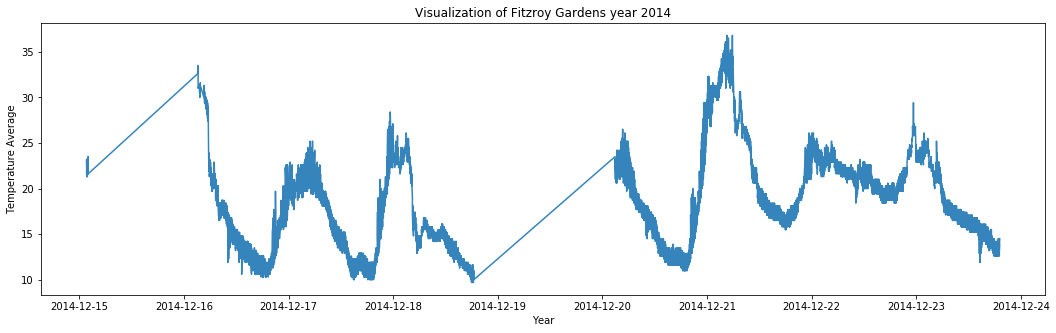

In [79]:
# model
print("========================================================")
print("Average temperature at Fitzroy Gardens only from 2014.")
print("=======================================================")
plt.figure(figsize=(18,5))
location_filter = data.location == 'Fitzroy Gardens'
time_filter = data.ts < pd.Timestamp('2015-01-01')
data_filtered = data[location_filter & time_filter]
#boards = data_filtered.boardid.unique()
plt.plot(data_filtered.ts, data_filtered.temp_avg,  alpha=.9)
plt.xlabel("Year")
plt.ylabel("Temperature Average")
plt.title("Visualization of Fitzroy Gardens year 2014")
plt.show()

Can you color separate different boards?

Can your plot the median?

Visulization of Fitzroy Gardens, year 2014, Board Id's with Color Seperation


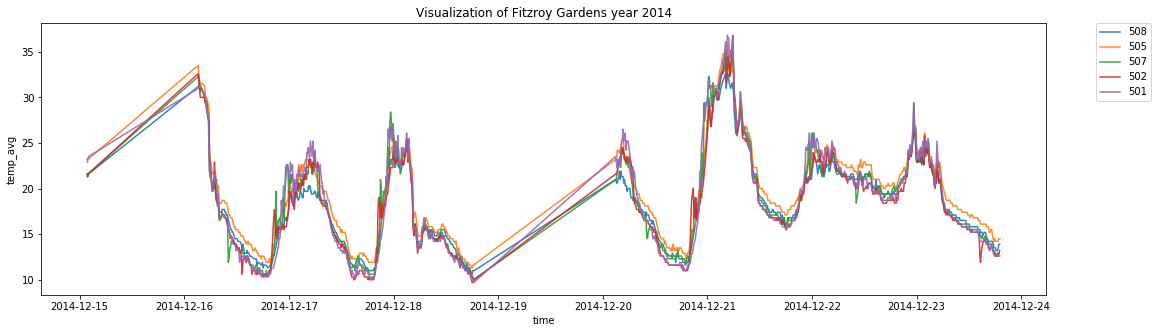

In [80]:
# model
print("=============================================================================")
print("Visulization of Fitzroy Gardens, year 2014, Board Id's with Color Seperation")
print("=============================================================================")

plt.figure(figsize=(18,5))
for i in range(len(a)): # Here a holds the board id's
    location_filter = data.boardid == a[i]
    time_filter = data.ts < pd.Timestamp('2015-01-01')
    data_filtered = data[location_filter & time_filter]
    boards = data_filtered.boardid.unique()
    plt.plot(data_filtered.ts, data_filtered.temp_avg,  alpha=.9,label=a[i])
   

plt.xlabel("time")
plt.ylabel("temp_avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Fitzroy Gardens year 2014")
plt.show()

Visulization of Docklands Library, year 2014, Board Id's with Color Seperation


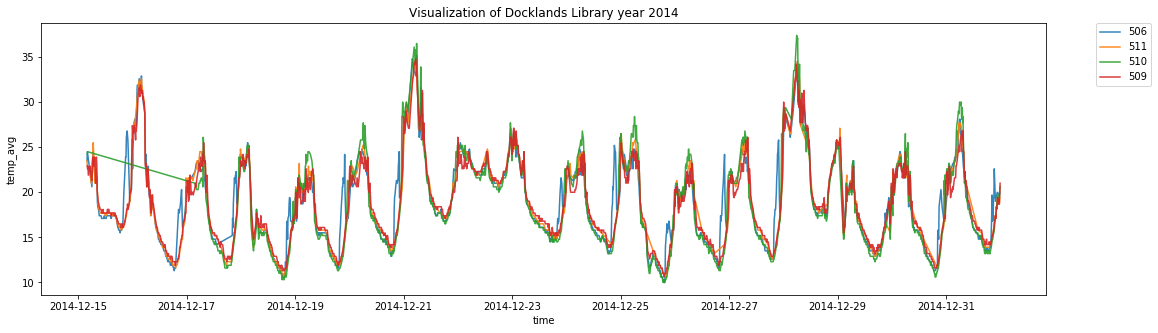

In [81]:
print("=============================================================================")
print("Visulization of Docklands Library, year 2014, Board Id's with Color Seperation")
print("=============================================================================")
plt.figure(figsize=(18,5))
for i in range(len(b)):  # Here b holds the board id's
    location_filter = data.boardid == b[i]
    time_filter = data.ts < pd.Timestamp('2015-01-01')
    data_filtered = data[location_filter & time_filter]
    boards = data_filtered.boardid.unique()
    #print(boards) 
    plt.plot(data_filtered.ts, data_filtered.temp_avg,  alpha=.9,label=b[i])  
plt.xlabel("time")
plt.ylabel("temp_avg")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Visualization of Docklands Library year 2014")
plt.show()

Visulization of Fitzroy Gardens, year 2014, BARCHART: MEDIAN: Temp_AVG


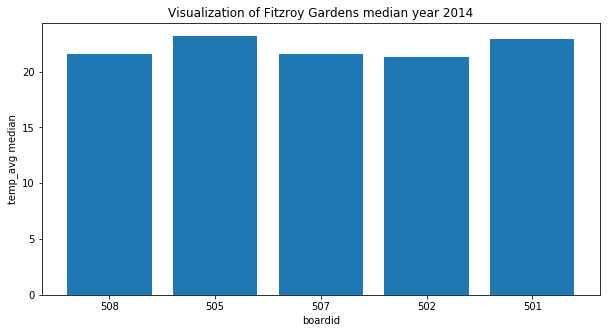

In [82]:
print("=============================================================================")
print("Visulization of Fitzroy Gardens, year 2014, BARCHART: MEDIAN: Temp_AVG")
print("=============================================================================")

plt.figure(figsize=(10,5))
fgtm=[]
for i in range(len(a)):
    
    temp=[]
    for l in range(len(data.boardid)):
        if (a[i]== data.boardid[l]):
            temp.append(data.temp_avg[i])
    fgtm.append(median(temp))
    
#print(tm)
y_pos = np.arange(len(a))

plt.bar(y_pos,fgtm )
plt.xticks(y_pos, a)
plt.xlabel("boardid")
plt.ylabel("temp_avg median")
plt.title("Visualization of Fitzroy Gardens median year 2014")
plt.show()

Visulization of Docklands Library, year 2014, BARCHART: MEDIAN: Temp_AVG


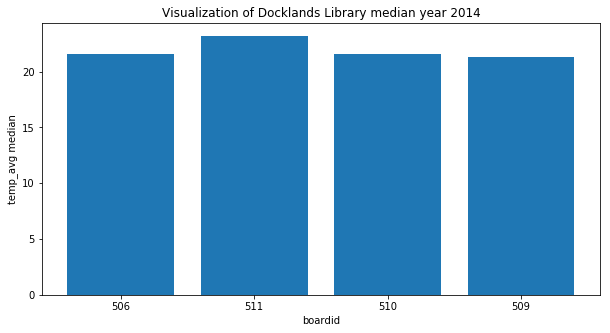

In [83]:
print("=============================================================================")
print("Visulization of Docklands Library, year 2014, BARCHART: MEDIAN: Temp_AVG")
print("=============================================================================")

plt.figure(figsize=(10,5))
dltm=[]
for i in range(len(b)):
    
    temp=[]
    for l in range(len(data.boardid)):
        if (b[i]== data.boardid[l]):
            temp.append(data.temp_avg[i])
    dltm.append(median(temp))
    
#print(tm)
y_pos = np.arange(len(b))

plt.bar(y_pos,dltm )
plt.xticks(y_pos, b)
plt.xlabel("boardid")
plt.ylabel("temp_avg median")
plt.title("Visualization of Docklands Library median year 2014")
plt.show()